# 상위 및 하위 throughput 값 비교

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from lightgbm import LGBMRegressor, plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier, LGBMRegressor

In [2]:
# config data(.csv) -> DataFrame
config_df = pd.read_csv("./data/result_config0.csv", sep=',')

In [3]:
# external data(.csv) -> DataFrame
external_df = pd.read_csv("./data/external_metrics0.csv", sep=',')
throughput_data = external_df['Gets_KB/sec']

In [4]:
# 최대, 최소 값 확인
print("max: {}".format(max(throughput_data)))
print("min: {}".format(min(throughput_data)))

max: 66377.65
min: 47520.43


In [5]:
# 40000~ 50000대 확인
index1 = (external_df['Gets_KB/sec'] >= 47520.43)
index2 = (external_df['Gets_KB/sec'] <= 50000)

external_df[index2]['Gets_KB/sec']

1662    48151.93
1795    47520.43
1918    49023.47
2277    48485.40
2437    47543.22
Name: Gets_KB/sec, dtype: float64

In [6]:
# 40000~50000 그룹핑
group1 =  list(external_df[index2].index)
group1

[1662, 1795, 1918, 2277, 2437]

In [7]:
# 60000대 확인
index3 = (external_df['Gets_KB/sec'] >= 65000)

external_df[index3]['Gets_KB/sec']

31      65011.44
280     65632.04
281     65767.16
282     66377.65
285     65321.22
288     66161.63
2007    65339.15
2010    65185.13
2036    65146.51
2051    65367.86
Name: Gets_KB/sec, dtype: float64

In [17]:
# 600000~ 그룹핑
group2 =  list(external_df[index3].index)
group2

[31, 280, 281, 282, 285, 288, 2007, 2010, 2036, 2051]

In [23]:
# config 파일 

knobs_rdb = {
    
    "save0_0": (700,1100),
    "save0_1": (1,9),
    "save1_0": (100,500),
    "save1_1": (10,100),
    "save2_0": (30,90),
    "save2_1": (8000,12000),

    "rdbcompression": ('yes', 'no'),
    "rdbchecksum": ('yes', 'no'),
    "rdb-save-incremental-fsync": ('yes', 'no'),

    "activedefrag": ('yes', 'no'),
    "active-defrag-threshold-lower": (1, 31),
    "active-defrag-threshold-upper": (70, 101),
    "active-defrag-cycle-min": (1, 31),
    "active-defrag-cycle-max": (70, 91),
    
    "maxmemory": (1000, 2900),
    
    "maxmemory-policy":     ("volatile-lru", "allkeys-lru", "volatile-lfu", "allkeys-lfu", 
                             "volatile-random","allkeys-random", "volatile-ttl", "noeviction"),
    "maxmemory-samples": (3, 7),
    "lazyfree-lazy-eviction": ('yes', 'no'),
    "lazyfree-lazy-expire": ('yes', 'no'),
    "lazyfree-lazy-server-del": ('yes', 'no'),

    "hash-max-ziplist-entries":     (256, 751), 
    "hash-max-ziplist-value": (16, 257),
    "activerehashing": ('yes', 'no'),
    "hz": (1, 41),
    "dynamic-hz": ('yes', 'no')
}

knobs_list = list(knobs_rdb.keys())
knobs_bound = list(knobs_rdb.values())

# config data(.csv) -> DataFrame
config_df = pd.read_csv("./result_config0.csv", sep=',')

In [24]:
# knob 들만 추출
config_df_knob = config_df.loc[:,knobs_list]

### config index
데이터 프레임 인덱스를 1 더한다.


### 비교 결과
( 샘플 생성 중 값, 다시 돌린 값)
#### 40000대
* 1795 : config11796 (47520.43, 61211.65)
* 2437 : config12438 ( 47543.22, 62077.59)

#### 60000대
* 282 : config10283 (66377.65, 62776.06)
* 288 : config10289 (66161.63 , 62168.97)

In [25]:
# 40000~ 50000
config_df_knob.loc[group1]

,save0_0,save0_1,save1_0,save1_1,save2_0,save2_1,rdbcompression,rdbchecksum,rdb-save-incremental-fsync,activedefrag,...,maxmemory-policy,maxmemory-samples,lazyfree-lazy-eviction,lazyfree-lazy-expire,lazyfree-lazy-server-del,hash-max-ziplist-entries,hash-max-ziplist-value,activerehashing,hz,dynamic-hz
1662,742,8,101,55,88,11162,yes,yes,no,yes,...,volatile-lfu,4,yes,yes,no,342,163,no,30,yes
1795,985,6,149,63,37,10506,no,yes,yes,yes,...,volatile-lfu,7,yes,no,yes,604,89,no,12,yes
1918,748,4,219,61,66,10702,yes,no,yes,NaN,...,noeviction,6,yes,yes,no,401,102,no,17,yes
2277,936,1,496,94,49,8855,yes,no,yes,NaN,...,volatile-lru,5,no,yes,yes,675,179,yes,28,yes
2437,751,8,422,69,56,11629,yes,yes,yes,NaN,...,volatile-ttl,5,no,yes,no,732,255,yes,32,no


In [26]:
# 60000~
config_df_knob.loc[group2]

,save0_0,save0_1,save1_0,save1_1,save2_0,save2_1,rdbcompression,rdbchecksum,rdb-save-incremental-fsync,activedefrag,...,maxmemory-policy,maxmemory-samples,lazyfree-lazy-eviction,lazyfree-lazy-expire,lazyfree-lazy-server-del,hash-max-ziplist-entries,hash-max-ziplist-value,activerehashing,hz,dynamic-hz
31,791,5,433,71,84,11880,yes,yes,yes,yes,...,noeviction,6,yes,no,no,567,56,yes,24,yes
280,932,7,279,71,33,9449,no,no,no,yes,...,noeviction,3,no,no,no,518,46,yes,39,yes
281,952,2,464,62,83,10574,yes,yes,yes,yes,...,allkeys-lfu,5,no,yes,no,338,29,no,6,yes
282,1073,2,470,37,57,8334,yes,no,yes,NaN,...,volatile-random,3,yes,no,no,652,128,yes,9,no
285,778,5,326,48,31,8676,no,no,yes,NaN,...,volatile-random,5,no,no,no,739,208,yes,32,no
288,1070,5,183,14,42,11677,no,yes,no,NaN,...,volatile-ttl,7,no,yes,no,617,141,no,32,no
2007,784,7,151,55,76,10844,yes,no,no,NaN,...,volatile-random,7,no,yes,no,558,104,no,34,no
2010,1029,6,301,99,39,8505,yes,no,no,yes,...,allkeys-lru,3,no,no,yes,307,253,yes,39,yes
2036,708,8,469,12,34,10671,no,no,yes,NaN,...,volatile-lru,6,yes,no,no,694,47,yes,22,no
2051,753,7,116,48,47,11530,no,yes,no,NaN,...,volatile-ttl,6,yes,no,no,383,147,no,40,yes


### 집중 분석

#### 1795 : config11796 (47520.43, 61211.65)

#### 282 : config10283 (66377.65, 62776.06)


* 61952.41 
* 61781.22


In [44]:
config11796_list = [
     61405.20, 
     62037.21,
     62790.46,
     50882.75,
     53117.00,
     63123.75,
     60953.72,
     62310.07,
     62165.16,
     63028.86,
     62071.70,
     62899.19,
     62422.44,
     59699.33,
     62539.54,
     61293.85,
     61547.00,
     60698.41,
     62001.42,
     62345.61,
     62083.89,
     62992.31,
     61465.27,
     61179.99,
     61081.99,
     61086.75,
     61966.45,
     63043.77,
     62400.26,
     61998.99
    ,59023.89
    ,62360.05
    , 62238.70
    , 62146.73
    , 62485.80 
    , 60601.26
    , 62535.97
    , 62095.70
    ,  63944.87 
    , 61297.06
    , 61059.83
    , 61398.15
    , 62541.83 
    , 
]

config10283_list = [
     63327.70,
     62611.30,
     60831.53,
     61640.79,
     59951.08,
     61889.27,
     62298.92,
     63488.50,
     62551.50,
     62472.36,
     61301.38,
     62490.37,
     62994.13,
     61933.85,
     62421.83,
     63036.52,
     60567.29,
     62276.93,
     61779.02,
     62755.34,
     60982.86,
     63831.44,
     62698.42,
     60228.61,
     60585.16,
     61705.77,
     61326.01,
     61858.12,
     63564.77,
     51344.15
    ,61129.91
    , 61470.73 
    , 62467.86
    ,61553.04
    ,62780.00
    , 61265.85
    ,62792.78
    , 62089.21
    ,61035.70
    ,63240.08
    , 63872.21
    , 61582.66 
    , 60460.74
    
    
]

config_gp = [
    63461.96,
    61888.84,
    64003.96,
    63283.22,
    63023.32,
    63592.04, 
    62337.44,
    63509.84,
    62700.17,
    62119.29,
    63145.66,
    62078.39,
    62098.26,
    63890.90,
    64342.15,
     62865.17, 
    63099.96,
    64290.19,
    64198.62,
    62216.01,
     62308.06,
    61944.43,
    61159.23,
     62137.84,
    64427.13,
    62717.43,
    61496.13,
    61935.48,
    60996.51,
    62058.65,
    65016.29,
    62194.84
    ,63038.05
    , 61773.59
    , 62012.81
    , 63913.01
    , 62346.62 
    , 61778.09 
    , 62129.97 
    , 62183.57 
    , 61353.76 
    , 61652.88
    , 65435.09 
]

config_t0 = [
    60679.38,
    62452.81,
    62932.05,
    63905.71,
    61936.38,
    61240.34,
    60867.49,
    61118.46,
    62538.84,
    62045.09,
    62502.67,
    63313.75,
    63317.59,
    63040.55 ,
    61425.68 ,
    62215.89,
    61600.79,
     63822.32 ,
    62528.31 ,
    64046.22 ,
     63704.70,
     63049.54 ,
     64988.84 ,
    63692.54 ,
    62721.21 ,
    63046.71,
    61222.89,
    63039.82 ,
    62584.69 ,
    61669.30,
    63097.82,
    62776.03 ,
    61045.50,
    64879.10 ,
    63732.41,
     61890.66 ,
    60904.89,
    64197.10 ,
    62296.18,
     62631.82 ,
    63476.22 ,
    61944.88,
    61845.17
]

In [45]:
df_config_hist = pd.DataFrame(config11796_list, columns=["config11796"])
df_config_hist['config10283'] = config10283_list
df_config_hist['config_gp'] = config_gp
df_config_hist['config_t0'] = config_t0

df_config_hist.head()

,config11796,config10283,config_gp,config_t0
0,61405.20,63327.70,63461.96,60679.38
1,62037.21,62611.30,61888.84,62452.81
2,62790.46,60831.53,64003.96,62932.05
3,50882.75,61640.79,63283.22,63905.71
4,53117.00,59951.08,63023.32,61936.38


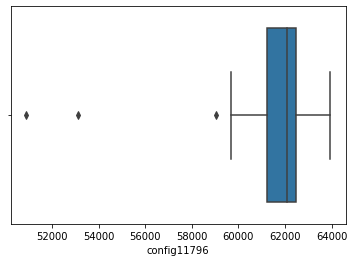

In [46]:
import seaborn as sns
sns.boxplot(x = "config11796",data = df_config_hist )
plt.show()

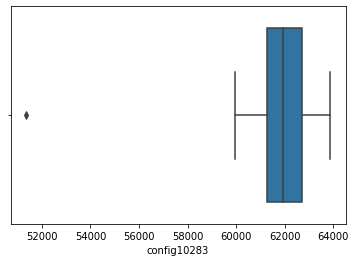

In [47]:
sns.boxplot(x = "config10283",data = df_config_hist )
plt.show()

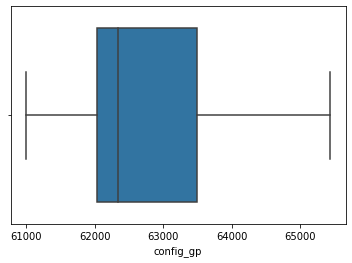

In [48]:
sns.boxplot(x = "config_gp",data = df_config_hist )
plt.show()

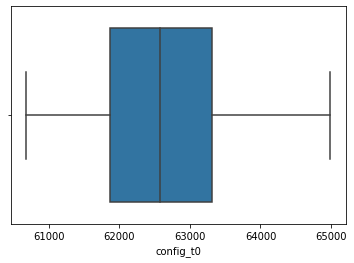

In [49]:
sns.boxplot(x = "config_t0",data = df_config_hist )
plt.show()

array([[<AxesSubplot:title={'center':'config11796'}>,
        <AxesSubplot:title={'center':'config10283'}>],
       [<AxesSubplot:title={'center':'config_gp'}>,
        <AxesSubplot:title={'center':'config_t0'}>]], dtype=object)

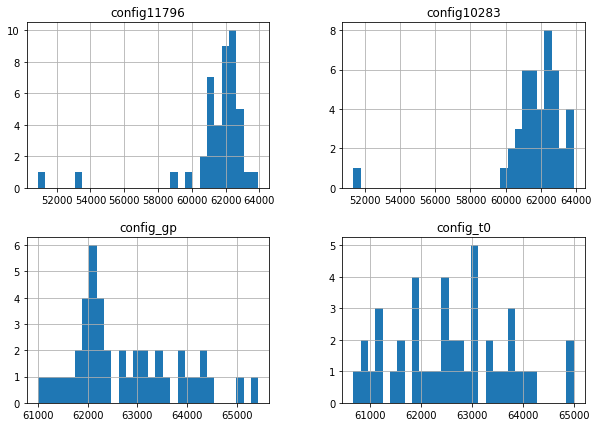

In [50]:
df_config_hist.hist(figsize=(10,7), bins=30)

In [51]:
print(df_config_hist[['config11796']].mean())
print(df_config_hist[['config10283']].mean())
print(df_config_hist[['config_gp']].mean())
print(df_config_hist[['config_t0']].mean())

config11796    61450.283256
dtype: float64
config10283    61778.736977
dtype: float64
config_gp    62747.787209
dtype: float64
config_t0    62603.914884
dtype: float64
